In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
import copy
from tqdm import tqdm
import pickle
from datetime import datetime

In [2]:
!git clone https://github.com/robertogastoldi/private.git
%cd private

Cloning into 'private'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 87 (delta 36), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (87/87), 27.88 KiB | 2.32 MiB/s, done.
Resolving deltas: 100% (36/36), done.
/content/private


In [3]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('../../main_code')))
from main_code.MCMCs import Neal_3, PPMx, Second_Layer
from main_code.data_generation import generate_gaussian_mixture
from main_code.visualization import plot_clusters

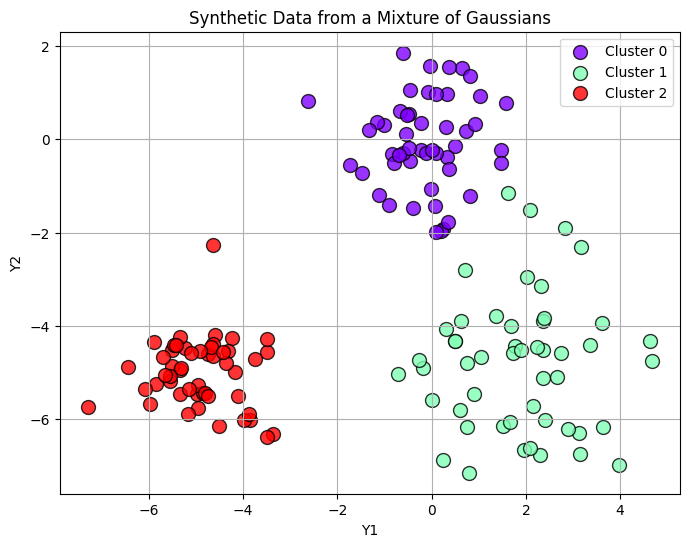

In [5]:
# Sample syntethic
np.random.seed(42)  # for reproducibility
random.seed(42)

# Y
means = [[0, 0], [2, -5], [-5, -5]]
covariances = [np.eye(2), 2 * np.eye(2), 0.5 * np.eye(2)]
n_samples = [50, 50, 50]

Y, labels = generate_gaussian_mixture(means, covariances, n_samples)

plot_clusters(Y, labels, "Synthetic Data from a Mixture of Gaussians", xlabel="Y1", ylabel="Y2")

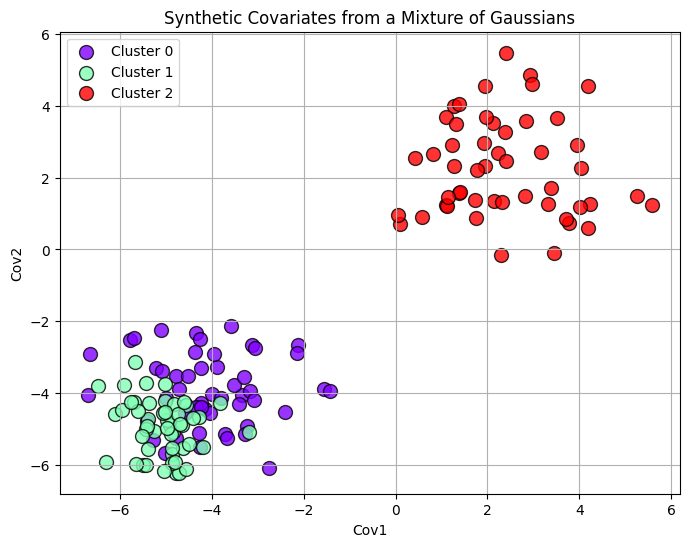

In [22]:
# X
means_X = [[-4, -4], [-5, -5], [2, 2]]
covariances_X = [ np.eye(2), 0.5* np.eye(2), 2 * np.eye(2)]
X, _ = generate_gaussian_mixture(means_X, covariances_X, n_samples)

plot_clusters(X, labels, "Synthetic Covariates from a Mixture of Gaussians", xlabel="Cov1", ylabel="Cov2")

# Primo Livello

In [21]:
iter = 500
burn_in = 50

neal_3 = Neal_3(alpha=0.1, lamb_0=1)

history = neal_3.fit(Y, iter, metrics=["entropy"])

MCMC Progress: 100%|██████████| 500/500 [02:58<00:00,  2.80step/s]


Similarity Matrix Progress: 100%|██████████| 451/451 [00:02<00:00, 182.34step/s]


<Figure size 640x480 with 0 Axes>

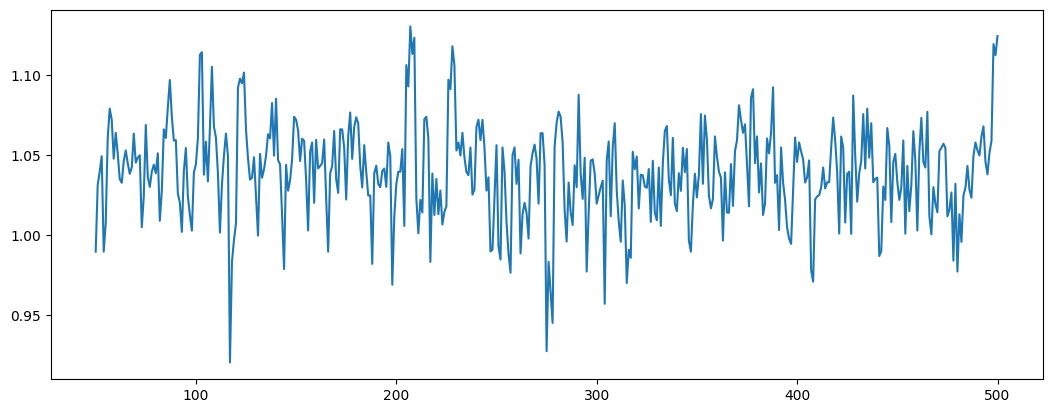

In [23]:
neal_3.compute_similarity_matrix(burn_in)
plt.figure()
iterations = list(range(iter + 1))

plt.figure(figsize=(12.8, 4.8))
plt.plot(iterations[burn_in:], neal_3.metrics["entropy"][burn_in:])
plt.show()

In [24]:
optimal_clustering, optimal_loss = neal_3.find_optimal_clustering()

Point Estimate Progress: 100%|██████████| 501/501 [00:17<00:00, 28.00step/s]


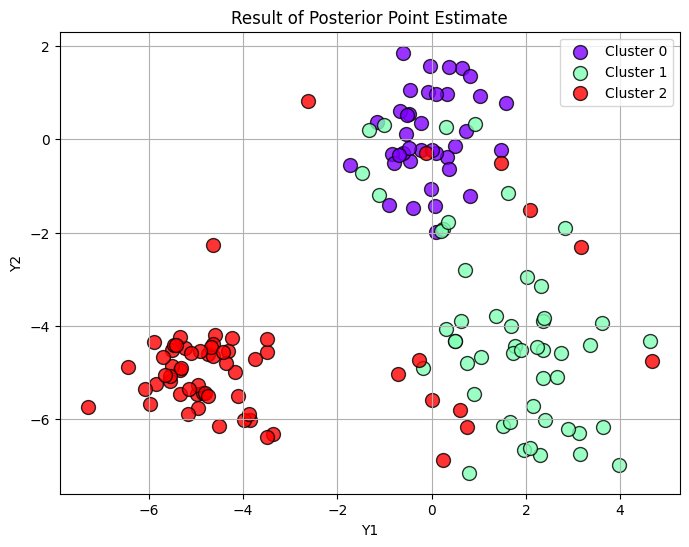

In [25]:
plot_clusters(Y, neal_3.optimal_clustering, "Result of Posterior Point Estimate", xlabel="Y1", ylabel="Y2")

# Secondo Livello

In [26]:
ppmx = Second_Layer()

In [27]:
lambda_pen = 0.75

iter = 100
burn_in = 20
iterations = list(range(iter + 1))


history = ppmx.fit(Y, X, optimal_clustering, iter, lambda_penalty=lambda_pen, metrics=["entropy"])

MCMC Progress: 100%|██████████| 100/100 [00:07<00:00, 12.96step/s]


Similarity Matrix Progress: 100%|██████████| 81/81 [00:00<00:00, 252.26step/s]


<Figure size 640x480 with 0 Axes>

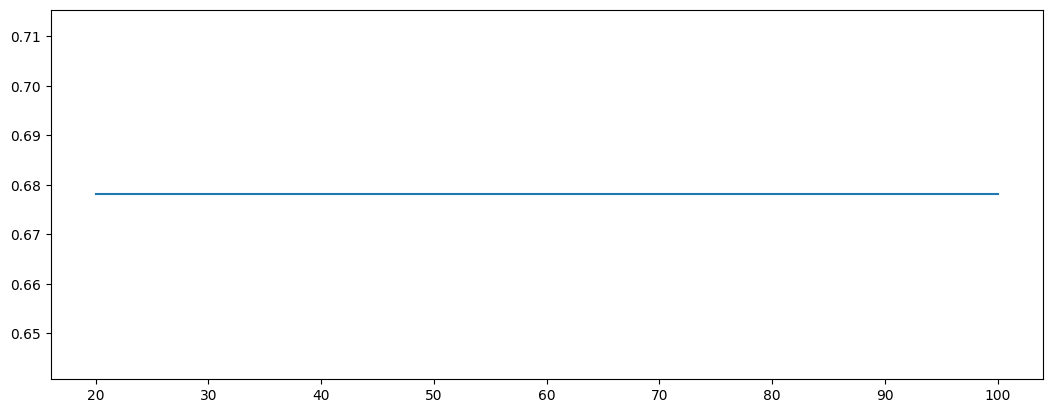

In [30]:
ppmx.compute_similarity_matrix(burn_in)
plt.figure()
iterations = list(range(iter + 1))

plt.figure(figsize=(12.8, 4.8))
plt.plot(iterations[burn_in:], ppmx.metrics["entropy"][burn_in:])
plt.show()

In [31]:
optimal_clustering, optimal_loss = ppmx.find_optimal_clustering()

Point Estimate Progress: 100%|██████████| 101/101 [00:03<00:00, 32.28step/s]


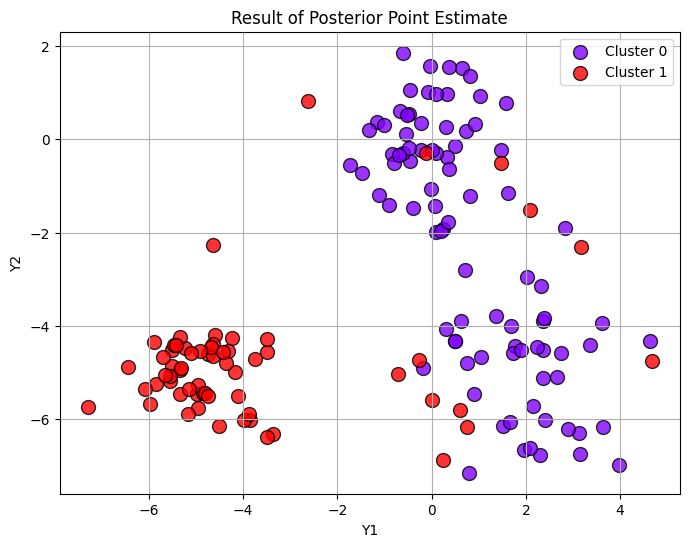

In [32]:
plot_clusters(Y, ppmx.optimal_clustering, "Result of Posterior Point Estimate", xlabel="Y1", ylabel="Y2")